#### Importing Required libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

#### Generating random data angles from 0 to 2*pi and random radii for circles

In [2]:
# generate the data
# generate random angles between [0, 2pi]
n = 800
rangle = 2 * np.pi * np.random.rand(n, 1)

# generate random radius for the first circle
e = 0.2
rr = 1.9 + e * np.random.rand(n, 1)

rx = rr * np.sin(rangle)
ry = rr * np.cos(rangle)

x = rx
y = ry

# generate random radius for the second circle
rr2 = 1.2 + e * np.random.rand(n, 1)

rx2 = rr2 * np.sin(rangle)
ry2 = rr2 * np.cos(rangle)

x = np.concatenate((x, rx2))
y = np.concatenate((y, ry2))

rx3 = 1.4 + (1.9 - 1.4) * np.random.rand(10, 1)
ry3 = e * np.random.rand(10, 1)

# uncomment this to comment the two rings;
x = np.concatenate((x, rx3))
y = np.concatenate((y, ry3))

#### Visualizing the data prepared for Spectral clustering

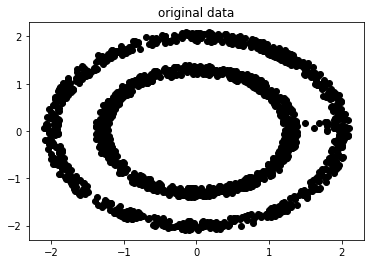

In [3]:
data = np.concatenate((x, y), axis=1)

plt.scatter(data[:, 0], data[:, 1], c='black')
plt.title('original data')
plt.show()

#### Running KMeans on this data prepared to identfify how clustering is performed

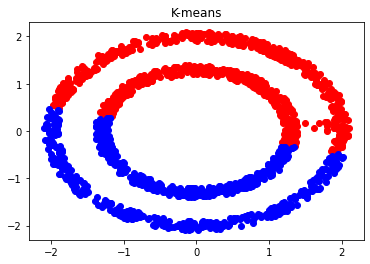

In [4]:
# run kmeans on the original coordinates
K = 2
kmeans = KMeans(n_clusters=K).fit(data)
idx = kmeans.labels_

plt.scatter([x for i, x in enumerate(data[:, 0]) if idx[i] == 0],
            [y for i, y in enumerate(data[:, 1]) if idx[i] == 0],
            c='r')

plt.scatter([x for i, x in enumerate(data[:, 0]) if idx[i] == 1],
            [y for i, y in enumerate(data[:, 1]) if idx[i] == 1],
            c='b')

plt.title('K-means')
plt.show()

#### Clearly, we can observe that KMeans is not able to cluster the rings as expected. We now experiment Spectral clustering on this dataset.

#### Clusering using Spectral Clustering

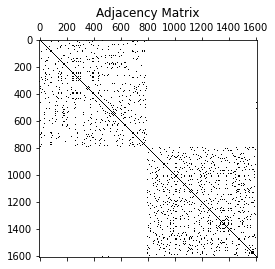

In [5]:
distmat = pairwise_distances(data) * pairwise_distances(data)

A = (distmat < 0.1).astype(np.int)

plt.spy(A)
plt.title('Adjacency Matrix')
plt.show()

D = np.diag(np.sum(A, axis=1))
L = D - A

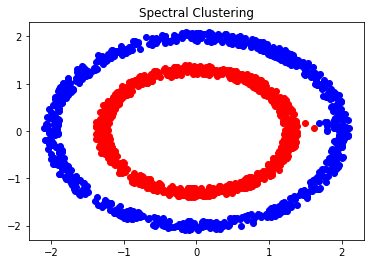

In [6]:
v, s, _=np.linalg.svd(L)
v = np.flip(v, 1)

K = 2
v = v[:, 0:K].real
kmeans = KMeans(n_clusters=K).fit(v)
idx = kmeans.labels_

plt.scatter([x for i, x in enumerate(data[:, 0]) if idx[i] == 0],
            [y for i, y in enumerate(data[:, 1]) if idx[i] == 0],
            c='r')

plt.scatter([x for i, x in enumerate(data[:, 0]) if idx[i] == 1],
            [y for i, y in enumerate(data[:, 1]) if idx[i] == 1],
            c='b')

plt.title('Spectral Clustering')
plt.show()

#### Spectral clustering works best in this scenario to separate the two rings as expected.

Code Reference : From Computational Data Analytics coursework